In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
blore_df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
blore_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
blore_df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

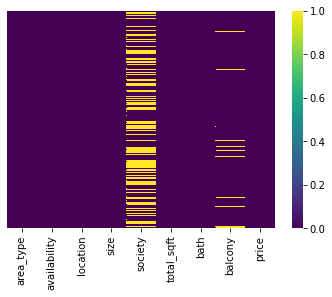

In [5]:
sns.heatmap(blore_df.isnull(),cmap = 'viridis',yticklabels = False)

From above, we see that the society column has max amount of null values. The balcony column has very less null values. So we can work around it

In [6]:
blore_df['area_type'].nunique()
blore_df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

This means that area_type is a categorical variable with 4 categories. 

In [7]:
blore_df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
12 Bedroom       1
43 Bedroom       1
18 Bedroom       1
16 BHK           1
13 BHK           1
14 BHK           1
19 BHK           1
27 BHK           1
Name: size, dtype: int64

Again, its a range of categories from 1 bhk to 43 bhk, not continous in nature

In [8]:
blore_df['location'].nunique()

1305

In [9]:
blore_df['location'].value_counts()

Whitefield                540
Sarjapur  Road            399
Electronic City           302
Kanakpura Road            273
Thanisandra               234
                         ... 
Michael Palaya              1
Millers Road                1
Vidyapeeta                  1
Off Bannergatta road        1
Ramanagara Channapatna      1
Name: location, Length: 1305, dtype: int64

In [10]:
blore_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
blore_df.shape

(13320, 9)

The fillna function is use to fill in null values with something else

Let's use the math floor function to get float values

In [12]:
from math import floor

balcony_mean = float(floor(blore_df['balcony'].mean()))
bath_mean = float(floor(blore_df['bath'].mean()))

blore_df['balcony'] = blore_df['balcony'].fillna(balcony_mean)
blore_df['bath'] = blore_df['bath'].fillna(bath_mean)

In [13]:
blore_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

There are almost 13k rows, and only 16 of them have null value in size. This is very small, so we can directly remove those values.

In [14]:
blore_df.drop('society',axis = 1, inplace = True)

In [15]:
blore_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
blore_df.dropna(inplace = True)

In [17]:
blore_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [18]:
blore_df.describe()

,bath,balcony,price
count,13303.000000,13303.000000,13303.000000
mean,2.689619,1.558295,112.584033
std,1.339393,0.807914,148.993820
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


17 rows have been dropped i.e the rows which had location null value or size null value

Now, let us make the size column in terms of integer value

In [19]:
blore_df['size'].str.split(' ')
#f you don’t pass expand=True, the function returns a single column (a pandas series) with the values resulting from the split inside a list.

0            [2, BHK]
1        [4, Bedroom]
2            [3, BHK]
3            [3, BHK]
4            [2, BHK]
             ...     
13315    [5, Bedroom]
13316        [4, BHK]
13317        [2, BHK]
13318        [4, BHK]
13319        [1, BHK]
Name: size, Length: 13303, dtype: object

In [20]:
blore_df['size'].str.split(' ',expand = True)

,0,1
0,2,BHK
1,4,Bedroom
2,3,BHK
3,3,BHK
4,2,BHK
...,...,...
13315,5,Bedroom
13316,4,BHK
13317,2,BHK
13318,4,BHK


In [21]:
blore_df['size'].str.split(' ',expand = True)[0]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: 0, Length: 13303, dtype: object

In [22]:
blore_df['bhk'] = blore_df['size'].str.split(' ',expand = True)[0]

In [23]:
blore_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
blore_df['bhk'] = blore_df['bhk'].astype(float)

In [25]:
blore_df.drop('size',axis = 1, inplace = True)

In [26]:
blore_df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0


In [27]:
blore_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see from above that there are ranges present. We will take the average value of the range and then reinsert it into the total_sqft column

In [28]:
def avgsqft(x):
    
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

The reason why we are using try and except is because there could be errors in conversion to float, and since we don't want errors, we are returning a null value whenever that happens

In [29]:
blore_df['total_sqft'].apply(avgsqft)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13303, dtype: float64

In [30]:
blore_df['total_sqft'] = blore_df['total_sqft'].apply(avgsqft)

In [31]:
blore_df

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,1.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [32]:
blore_df.isnull().sum()

area_type        0
availability     0
location         0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
dtype: int64

Now, we can remove these null values from total_sqft by dropping them since its a small number as compared to the entire dataset

In [33]:
blore_df.dropna(inplace = True)

In [34]:
blore_df.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

Now let's calculate the price per sqft:

In [35]:
blore_df['price'] = blore_df['price'] * 100000 #Since our prices are supposed to be in lakhs
blore_df['price_per_sqft'] = blore_df['price']/blore_df['total_sqft']

In [36]:
blore_df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,3907000.0,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,12000000.0,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,6200000.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,9500000.0,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,5100000.0,2.0,4250.000000


In [37]:
blore_df['location'].value_counts()

Whitefield                537
Sarjapur  Road            397
Electronic City           302
Kanakpura Road            271
Thanisandra               233
                         ... 
Medaralli                   1
Kalhalli                    1
Michael Palaya              1
Millers Road                1
Ramanagara Channapatna      1
Name: location, Length: 1298, dtype: int64

Lets remove the trailing spaces at the end to see correctly what is the count that we have. The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove)

In [38]:
blore_df['location'] = blore_df['location'].apply(lambda x: x.strip())

In [39]:
blore_df['location'].value_counts()

Whitefield                  538
Sarjapur  Road              397
Electronic City             304
Kanakpura Road              271
Thanisandra                 236
                           ... 
P Krishnappa Layout           1
Old Town                      1
Bull Temple Road              1
Howthinarayanappa Garden      1
Ramanagara Channapatna        1
Name: location, Length: 1287, dtype: int64

Let's see what all locations have less than 10 houses, and give it the category of 'others'

In [40]:
location_count = blore_df['location'].value_counts()

In [41]:
location_count[location_count <= 10]

BTM 1st Stage               10
Gunjur Palya                10
Thyagaraja Nagar            10
Dairy Circle                10
Kalkere                     10
                            ..
P Krishnappa Layout          1
Old Town                     1
Bull Temple Road             1
Howthinarayanappa Garden     1
Ramanagara Channapatna       1
Name: location, Length: 1047, dtype: int64

In [42]:
location_count_less_than_10 = location_count[location_count <= 10]

In [43]:
blore_df['location'] = blore_df['location'].apply(lambda x:'other' if x in location_count_less_than_10 else x) 

In [44]:
blore_df['location'].value_counts()

other                 2873
Whitefield             538
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         271
                      ... 
Narayanapura            11
Tindlu                  11
HAL 2nd Stage           11
Banjara Layout          11
Pattandur Agrahara      11
Name: location, Length: 241, dtype: int64

Now we have successfully reduced the different types of location from around 1300 to around 240

We can now proceed with removing the outliers

### Outlier detection and removal

In [45]:
blore_df['total_sqft'].describe()

count    13257.000000
mean      1558.809175
std       1238.478935
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

We can see that there is a min sqft of 1, which isn't logically possible. Infact, 1 bhk should be atleast 300 sqft. So let's find out all the homes that have <300 sqft per bhk.


In [46]:
blore_df = blore_df[blore_df['total_sqft']/blore_df['bhk'] >= 300]

In [47]:
blore_df['total_sqft'].describe()

count    12513.000000
mean      1593.745883
std       1261.402072
min        300.000000
25%       1116.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [48]:
blore_df.drop('total_sqft_per_bhk',axis = 1,inplace = True)
blore_df.drop('not_feasible',axis = 1,inplace = True)


KeyError: "['total_sqft_per_bhk'] not found in axis"

In [49]:
blore_df

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,3907000.0,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,12000000.0,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,6200000.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,9500000.0,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,5100000.0,2.0,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,23100000.0,5.0,6689.834926
13316,Super built-up Area,Ready To Move,other,3600.0,5.0,1.0,40000000.0,4.0,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,6000000.0,2.0,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,48800000.0,4.0,10407.336319


In [50]:
blore_df.shape

(12513, 9)

Now, we need to look at the upper bounds of price_per_sqft and then remove the outliers from there

In [51]:
blore_df['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

clearly, the value of max is too high. So what we can do is, we can only consider those data whose price_per_sqft lies within 1 standard deviation(plus and minus) away from the mean

In [52]:
def remove_price_per_sqft_outliers(df):
    
    df_out = pd.DataFrame()
    
    for location, sub_df in df.groupby('location'): #you get the key from the location, and a sub dataframe of that
        m = sub_df['price_per_sqft'].mean() #from each location, you have taken the mean of price_per_sqft
        std = sub_df['price_per_sqft'].std() 
        reduce_df = sub_df[(sub_df['price_per_sqft'] > m - std) & (sub_df['price_per_sqft'] <= m + std)]
        df_out = pd.concat([df_out,reduce_df])
    return df_out

blore_df = remove_price_per_sqft_outliers(blore_df)
blore_df.describe()

        

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10338.000000,10338.000000,10338.000000,1.033800e+04,10338.000000,10338.000000
mean,1507.883363,2.473012,1.571967,9.133127e+06,2.576030,5662.335118
std,879.167276,0.981544,0.791201,8.641115e+06,0.899988,2272.161172
min,300.000000,1.000000,0.000000,1.000000e+06,1.000000,1250.000000
25%,1109.000000,2.000000,1.000000,4.900000e+06,2.000000,4243.008921
50%,1285.000000,2.000000,2.000000,6.700000e+06,2.000000,5176.359705
75%,1650.000000,3.000000,2.000000,1.000000e+07,3.000000,6432.748538
max,30400.000000,16.000000,3.000000,2.200000e+08,16.000000,24509.803922


As we can see, the max sqft is around 24.5k per sqft, which is reasonable for a high-end house in Bangalore 

Next, we need to work on the outliers for bhk

In [53]:
def bhk_outlier_remover(df):
    for location, location_df in groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : bhk_df['price_per_sqft'].mean(),
                'std' : bhk_df['price_per_sqft'].std(),
                'count': bhk_df.shape[0] #As the first column of a groupby based on bhk will be bhk itself

            }
            print(location, bhk_stats)
           

This above code will ensure that we get data for each location, and under each location, we will get mean, std and count for each type of bhk.

In [54]:
#df.groupby(by=["b"], dropna=False).sum()
#    a   c
#b
#1.0 2   3
#2.0 2   5
#NaN 1   4
#This is how a groupby works. 

Now what could be a possible value for the lower bound of a 3bhk flat in JP Nagar 7th Phase? Well, we could see it can be the mean of the 2BHK flat. So our condition would be that those flats whose minimum value is lesser than the mean of the previous category of BHK, we will ignore those. Along with this, we will consider atleast 5 houses under each category of BHK in a particular area to be the minimum.

In [55]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])#We have created an empty array to collect the indices of all the values that we won't take
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {        #This is a dictionary that is created
                'mean' : bhk_df['price_per_sqft'].mean(),
                'std' : bhk_df['price_per_sqft'].std(),
                'count': bhk_df.shape[0] #As the first column of a groupby based on bhk will be bhk itself

            }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk - 1) #.get() is used to get values from a dictionary. If the value doesn't exist, it will return none and no error will be shown by the program
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft'] <(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [56]:
blore_df = bhk_outlier_remover(blore_df)

In [57]:
blore_df.shape

(7397, 9)

In [58]:
blore_df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
210,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,42800000.0,4.0,15017.543860
848,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,19400000.0,3.0,11901.840491
2152,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,23500000.0,3.0,12533.333333
7138,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,13000000.0,3.0,10833.333333
7358,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,14800000.0,2.0,11983.805668


Now the columns that we need are location, total_sqft, bath, bhk and price. We can remove the other columns. price_per_sqft column was used only to remove the outliers and clean the data.

In [69]:
# blore_df.drop('area_type',axis = 1,inplace = True)
# blore_df.drop('availability',axis = 1,inplace = True)
# blore_df.drop('balcony',axis = 1,inplace = True)
# blore_df.drop('price_per_sqft',axis = 1,inplace = True)
#instead of the above 4 lines, we can do it like this:
blore_df.drop(columns = ['area_type','availability','balcony','price_per_sqft'],inplace = True)
blore_df.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,42800000.0,4.0
848,1st Block Jayanagar,1630.0,3.0,19400000.0,3.0
2152,1st Block Jayanagar,1875.0,2.0,23500000.0,3.0
7138,1st Block Jayanagar,1200.0,2.0,13000000.0,3.0
7358,1st Block Jayanagar,1235.0,2.0,14800000.0,2.0


Now we want to save this cleaned data as a csv file.

In [60]:
blore_df.to_csv('Cleaned_Bangalore_Data.csv')

Now, let's arrange our X and y columns for our Model

In [114]:
X = blore_df.drop('price',axis = 1)
y = blore_df['price']
# X = blore_df.drop(columns = ['price'])
# y = blore_df['price']

The process of choosing the best parameter/model is called hyperparameter tuning. This can be done through GridSearchCV

In [115]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import ShuffleSplit
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

In [116]:
# def find_best_model(X,y):
#     models = {
#         'linear regression': {
#             'model': LinearRegression(),
#             'parameters' : {
#                 'normalize' : [True, False]
#             }
#         },
#         'lasso' : {
#             'model' : Lasso(),
#             'parameters' : {
#                 'alpha' : [1,2],
#                 'selection' : ['random','cyclic']
#             }
#         },
#         'decision_tree': {
#             'model' : DecisionTreeRegressor(),
#             'parameters' : 
#         }
#     }
blore_df.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,42800000.0,4.0
848,1st Block Jayanagar,1630.0,3.0,19400000.0,3.0
2152,1st Block Jayanagar,1875.0,2.0,23500000.0,3.0
7138,1st Block Jayanagar,1200.0,2.0,13000000.0,3.0
7358,1st Block Jayanagar,1235.0,2.0,14800000.0,2.0


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer


You use colummn transformer whenever you have features in your dataframe that require different pre-processing. For eg, the one hot encoding step will be applied only to the location column in our case(as that's the only categorical feature that's supposed to be encoded) and not to any other columns. So we use a column transformer to accomoplish this task.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
print(X_train.shape)
print(X_test.shape)

(5917, 4)
(1480, 4)


In [128]:
column_trans = make_column_transformer((OneHotEncoder(sparse = False),['location']),remainder = 'passthrough')
#It is important to keep sparse = False to ensure that the fitting of our pipeline happens in the later steps. A sparse
# matrix is one which has a lot of zeros in the matrix. Some algorithms are not written to operate on sparse matrices, 
# and so forcing your OneHotEncoder to produce dense output is desirable despite the additional memory use. Dense matrices can 
# be got by using sparse = False

The above line meaning is that: apply OneHotEncoder to the location column, and for the remaining columns just pass through it without doing anything.

Next we need to fit and transform the column_trans to our actual data

The reason why we need to scale our data is because the different features column may not be of the same units, so they've to be scaled such that the magnitudes are now of same units. This will help the algorithms find the regression line(for eg) much faster.

In [129]:
scaler = StandardScaler()

In [130]:
linreg = LinearRegression(normalize = True)

What is the use of a pipeline?
It is used to chain steps together, sequentially. Normally, you put preprrocessing steps and model building steps in a pipeline.
Why should you build a pipeline?
1. It allows you to properly cross validate a process, rather than just a model. The process will include preprocessing and model building both.
2. You can do a gridsearch or a randomise search of a pipeline, so you can do these methods for both tuning parameters for model and the preprocessing steps. You can do both together at once.

Now we need to import the pipeline

In [131]:
from sklearn.pipeline import make_pipeline

In [132]:
pipe = make_pipeline(column_trans,scaler,linreg)

This above step chains column_trans, scaler and linreg steps together. It applies the preprocessing first, scales our data appropriately and then builds the model.

We generally fit our training data on our model. But in our case the model is present in our pipeline. Hence we fit our training data on the pipeline.

In [133]:
blore_df.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,42800000.0,4.0
848,1st Block Jayanagar,1630.0,3.0,19400000.0,3.0
2152,1st Block Jayanagar,1875.0,2.0,23500000.0,3.0
7138,1st Block Jayanagar,1200.0,2.0,13000000.0,3.0
7358,1st Block Jayanagar,1235.0,2.0,14800000.0,2.0


In [134]:
pipe.fit(X, y)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

Now we predict from the pipeline:

In [136]:
y_pred_linreg = pipe.predict(X_test)

To check the accuracy of a Linear Regression model, we need to check the R2 score.

pipe.predict is similar to model.predict, but it runs the preprocessing on X_test, scales it and then does Linear Regression on it, all in one step.

In [140]:
from sklearn.metrics import r2_score

In [142]:
r2_score(y_test, y_pred_linreg)

0.8559358205918894

### Applying Lasso

In [144]:
lasso = Lasso()

We need to make another pipeline and then apply it 

In [145]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [146]:
pipe.fit(X_train,y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.427e+16, tolerance: 5.439e+13
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [147]:
y_pred_lasso = pipe.predict(X_test)

In [148]:
r2_score(y_test,y_pred_lasso)

0.8447993422209648

### Applying Ridge

In [149]:
ridge = Ridge()

In [150]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [151]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [153]:
y_pred_ridge = pipe.predict(X_test)

In [154]:
r2_score(y_test,y_pred_ridge)

0.8447941316092071

Now we can see that the Linear Regression has the highest accuracy, hence we can choose Linear Regression for our prediction

Now we need to create a function to predict our values:

In [157]:
X['location'][0]

'Electronic City Phase II'

In [156]:
def prediction(location,total_sqft,bath,bhk):
    loc_index = -1
    
    if location != 'other':
        loc_index = X['location'][0][0]
        